In [6]:
!pip install neuron
!pip install netpyne
import matplotlib

You should consider upgrading via the '/u/salvadord/venvs/neuron78/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 37.0 MB 6.8 MB/s 
    ERROR: Command errored out with exit status 1:
     command: /u/salvadord/venvs/neuron78/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bw/wjc7k1z10vlbs6f_cypxhnb40000gn/T/pip-install-u4lds2qm/matplotlib/setup.py'"'"'; __file__='"'"'/private/var/folders/bw/wjc7k1z10vlbs6f_cypxhnb40000gn/T/pip-install-u4lds2qm/matplotlib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/bw/wjc7k1z10vlbs6f_cypxhnb40000gn/T/pip-pip-egg-info-4ijcqipq
         cwd: /private/var/folders/bw/wjc7k1z10vlbs6f_cypxhnb40000gn/T/pip-install-u4lds2qm/matplotlib/
    Complete output (156 lines):
    IMPORTANT WARNING:
        pkg-confi

In [7]:
!git clone https://github.com/suny-downstate-medical-center/netpyne-course-2021.git
#!rm x86_64
!nrnivmodl netpyne-course-2021
#from neuron import load_mechanisms
#try:
#  load_mechanisms('.')
#except:
#  print('already loaded')

/site-packages/neuron/.data/bin/nocmodl Nca.mod
 -> NMODL OFThpo.mod
MODLUNIT=/Users/salvadord/venvs/neuron78/lib/python3.8/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
	  /Users/salvadord/venvs/neuron78/lib/python3.8/site-packages/neuron/.data/bin/nocmodl OFThpo.mod
Translating NMDA.mod into NMDA.c
Translating Nca.mod into Nca.c
INCLUDEing netcon.inc
Translating OFThpo.mod into OFThpo.c
Notice: Assignment to the GLOBAL variable, "tadj", is not thread safe
Thread Safe
Thread Safe
 -> NMODL OFThresh.mod
MODLUNIT=/Users/salvadord/venvs/neuron78/lib/python3.8/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
	  /Users/salvadord/venvs/neuron78/lib/python3.8/site-packages/neuron/.data/bin/nocmodl OFThresh.mod
 -> NMODL ar.mod
MODLUNIT=/Users/salvadord/venvs/neuron78/lib/python3.8/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib \
	  /Users/salvadord/venvs/neuron78/lib/python3.8/site-packages/neuron/.data/bin/nocmodl ar.mod
 -> NMODL cad.mod
MODLUNIT=/Users/salvadord/ve


Start time:  2021-07-09 17:21:16.531056

Creating network of 5 cell populations on 1 hosts...
  Number of cells on node 0: 500 
  Done; cell creation time = 0.08 s.
Making connections...
  Number of connections on node 0: 7227 
  Done; cell connection time = 0.92 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 1.65 s; real-time ratio: 0.61.

Gathering data...
  Done; gather time = 0.22 s.

Analyzing...
  Cells: 500
  Connections: 7227 (14.45 per cell)
  Spikes: 4340 (8.68 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 1.65 s
  Done; saving time = 0.65 s.
Plotting raster...


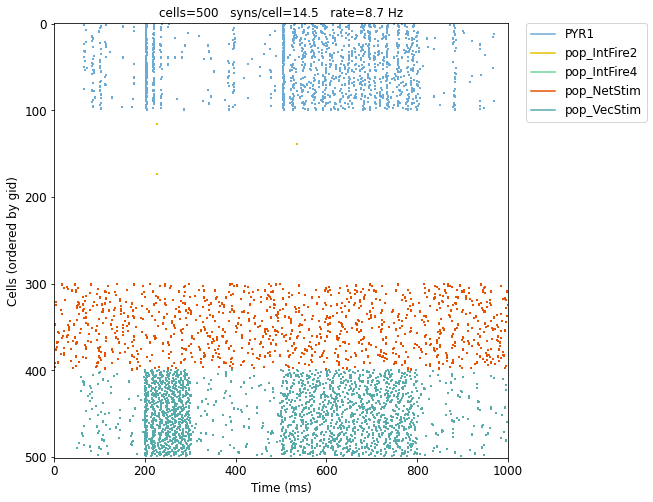

  Done; plotting time = 1.05 s

Total time = 4.57 s

End time:  2021-07-09 17:21:21.099059


In [8]:
"""
tut_artif.py

Tutorial on artificial cells (no sections)
"""

from netpyne import specs, sim
from netpyne.specs import Dict

netParams = specs.NetParams()  # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()  # dictionary to store sets of simulation configurations


###############################################################################
# NETWORK PARAMETERS
###############################################################################
# Cell parameters
## PYR cell properties
cellParams = Dict()
cellParams.secs.soma.geom = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}
cellParams.secs.soma.mechs.hh = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}
netParams.cellParams['PYR'] = cellParams

## IntFire2 artificial cell
netParams.cellParams['artif_IntFire2'] = {
    'cellModel': 'IntFire2', 
    'ib': 0.0}  

## IntFire4 artificial cell
netParams.cellParams['artif_IntFire4'] = {
    'cellModel': 'IntFire4', 
    'taue': 1.0}

## NetStim artificial spike generator
netParams.cellParams['artif_NetStim'] = {
    'cellModel': 'NetStim'}
    
## VecStim artificial spike generator
netParams.cellParams['artif_VecStim'] = {
    'cellModel': 'VecStim'}  # pop of Vecstims with 2 pulses


# Population parameters
netParams.popParams['PYR1'] = {
    'cellType': 'PYR', 
    'numCells': 100} # pop of HH cells

netParams.popParams['pop_IntFire2'] = {
    'cellType': 'artif_IntFire2', 
    'numCells': 100}  # pop of IntFire2

netParams.popParams['pop_IntFire4'] = {
    'cellType': 'artif_IntFire4', 
    'numCells': 100}  # pop of IntFire4

netParams.popParams['pop_NetStim'] = {
    'cellType': 'artif_NetStim', 
    'numCells': 100,
    'rate': 10, 
    'noise': 0.8, 
    'start': 1, 
    'seed': 2}  # pop of NEtSims

netParams.popParams['pop_VecStim'] = {
    'cellType': 'artif_VecStim', 
    'numCells': 100, 
    'rate': 5, 
    'noise': 0.5, 
    'start': 50,
    'pulses': [{'start': 200, 'end': 300, 'rate': 60, 'noise':0.2}, 
               {'start': 500, 'end': 800, 'rate': 30, 'noise': 0.5}]}  # pop of Vecstims with 2 pulses


# Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0}



# Connections
netParams.connParams['NetStim->PYR1'] = {
    'preConds': {'pop': 'pop_NetStim'}, 
    'postConds': {'pop': 'PYR1'},
    'convergence': 3,
    'weight': 0.002,
    'synMech': 'AMPA',
    'delay': 'uniform(1,5)'}


netParams.connParams['VecStim->PYR1'] = {
    'preConds': {'pop': 'pop_VecStim'}, 
    'postConds': {'pop': 'PYR1'},
    'probability': 0.4,
    'weight': 0.005,
    'synMech': 'AMPA',
    'delay': 'uniform(1,5)'}

netParams.connParams['PYR1->IntFire2'] = {
    'preConds': {'pop': 'PYR1'}, 
    'postConds': {'pop': 'pop_IntFire2'},
    'probability': 0.2,
    'weight': 0.05,
    'synMech': 'AMPA',
    'delay': 'uniform(1,5)'}


netParams.connParams['IntFire2->IntFire4'] = {
    'preConds': {'pop': 'pop_IntFire2'}, 
    'postConds': {'pop': 'pop_IntFire4'},
    'probability': 0.1,
    'weight': 0.2,
    'delay': 'uniform(1,5)'}


###############################################################################
# SIMULATION PARAMETERS
###############################################################################

# Simulation parameters
simConfig.duration = 1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.1 # Internal integration timestep to use
simConfig.createNEURONObj = 1  # create HOC objects when instantiating network
simConfig.createPyStruct = 1  # create Python structure (simulator-independent) when instantiating network
simConfig.verbose = 0 #False  # show detailed messages

# Recording
simConfig.recordTraces = {'Vsoma':{'sec':'soma','loc':0.5,'var':'v'}}

# # Analysis and plotting
simConfig.analysis['plotRaster'] = {'orderInverse': True}


###############################################################################
# RUN SIM
###############################################################################

sim.createSimulateAnalyze()


1) Modify the network to show that you can use the IntFire2 population to provide inhibition to another population (probably using negative weights).